In [1]:
import pandas as pd
import json
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
RESULTS_PATH = './results/'
TESTS = ['test_1', 'test_3']
EXTENSION = '.json'

In [2]:
with open(RESULTS_PATH + TESTS[0] + EXTENSION) as f:
    test_1 = json.load(f)[TESTS[0]]
df_t1 = pd.DataFrame(test_1)
# Replace -1e9 in best_fit for +1e9 in order to compute the score:
df_t1['best_fit'] = df_t1['best_fit'].replace(-1_000_000, 1_000_000)
# Print the first rows:
df_t1.head(None)
# # Drop where function = HolderTableFunction:
# df_t1 = df_t1[df_t1['function'] != 'HolderTableFunction']

,algorithm,function,function_type,dimension,best_fit,best_ind,elapsed_time,seed,num_eval
0,TensorCro,AckleyFunction,local_minima,500,1.689693,"[0.8795084953308105, 0.008874413557350636, 0.0...",100.031131,2023,3815
1,GeneticAlgorithm,AckleyFunction,local_minima,500,15.836116,"[2.332674988463067, 2.0189780397871484, -8.065...",100.200603,2023,467
2,PSOAlgorithm,AckleyFunction,local_minima,500,20.426127,"[-7.134469135488038, -17.219824480502965, -24....",100.019416,2023,720
3,HarmonySearchAlgorithm,AckleyFunction,local_minima,500,21.035342,"[3.3558531622379593, -13.392862411763002, -7.5...",100.017413,2023,5486
4,SimulatedAnnealingAlgorithm,AckleyFunction,local_minima,500,21.316629,"[-9.768631717118826, 3.1966465588896313, -13.8...",100.000155,2023,1104032
...,...,...,...,...,...,...,...,...,...
4795,TensorCro,Powell,other,350,179.973984,"[1.3504338264465332, -0.11417263746261597, 0.4...",100.047004,2032,2125
4796,GeneticAlgorithm,Powell,other,350,5121.542776,"[-0.3390777035955329, 0.5119830120632831, 0.79...",100.069830,2032,948
4797,PSOAlgorithm,Powell,other,350,53684.331706,"[0.0773279823052295, 0.41151224433410405, -0.8...",100.045134,2032,1411
4798,HarmonySearchAlgorithm,Powell,other,350,157574.529833,"[-0.7222451240047398, 0.1379964021551345, -3.3...",100.004982,2032,13877


In [3]:
with open(RESULTS_PATH + TESTS[1] + EXTENSION) as f:
    test_3 = json.load(f)[TESTS[1]]
df_t3 = pd.DataFrame(test_3)
# Replace -1e9 in best_fit for +1e9 in order to compute the score:
df_t3['best_fit'] = df_t3['best_fit'].replace(-1_000_000, 1_000_000)
# Print the first rows:
df_t3.head(None)
# # Drop where function = HolderTableFunction:
# df_t3 = df_t3[df_t3['function'] != 'HolderTableFunction']

,algorithm,function,function_type,dimension,best_fit,best_ind,elapsed_time,seed,num_eval
0,TensorCRO:/GPU:0,AckleyFunction,local_minima,500,1.235413e+00,"[-0.01295708492398262, 0.006987644359469414, 0...",300.040753,2023,11026
1,TensorCRO:/GPU:0,AckleyFunction,local_minima,350,1.370094e+00,"[-0.006238255649805069, 0.011432647705078125, ...",300.088972,2023,14039
2,TensorCRO:/GPU:0,AckleyFunction,local_minima,200,1.089790e+00,"[-0.003583453595638275, 0.012113469652831554, ...",300.083621,2023,20733
3,TensorCRO:/GPU:0,AckleyFunction,local_minima,50,4.607391e-02,"[-0.003953553736209869, 0.0002244655042886734,...",300.047823,2023,69385
4,TensorCRO:/GPU:0,AckleyFunction,local_minima,20,1.794434e-02,"[0.0016631586477160454, -0.008200336247682571,...",300.044250,2023,104570
...,...,...,...,...,...,...,...,...,...
1915,TensorCRO:/CPU:0,Powell,other,350,1.044911e+02,"[-0.43341943621635437, 0.050545722246170044, -...",300.098655,2032,4959
1916,TensorCRO:/CPU:0,Powell,other,200,3.675535e+00,"[0.2087632566690445, -0.021207623183727264, 0....",300.057281,2032,14981
1917,TensorCRO:/CPU:0,Powell,other,50,9.357023e-02,"[0.2881622016429901, -0.029464412480592728, 0....",300.047539,2032,99901
1918,TensorCRO:/CPU:0,Powell,other,20,5.190489e-03,"[-0.0853404626250267, 0.00847074668854475, -0....",300.043436,2032,176265


In [4]:
# Compute an artificial score based on the best_fit over the rest of the algorithms:
# The best position gets 10 points.
# The second best position gets 6 points.
# The third best position gets 3 points.
# The fourth best position gets 1 point.
# The fifth best position gets 0 points.
# Compute on test_1:
# df_t1['score'] = df_t1.groupby(['function', 'algorithm', 'dimension'])['best_fit'].rank(method='dense', ascending=True)
# df_t1['score'] = df_t1['score'].replace(1, 10)
# df_t1['score'] = df_t1['score'].replace(2, 6)
# df_t1['score'] = df_t1['score'].replace(3, 3)
# df_t1['score'] = df_t1['score'].replace(4, 1)
# df_t1['score'] = df_t1['score'].replace(5, 0)
pdf = df_t1.groupby(['function', 'dimension', 'algorithm', 'seed'])['best_fit'].mean().reset_index()

In [5]:
# Plot the score for each function (one in each subplot), it is a lineplot for each algorithm with x axis is the dimension:
for idx, func in enumerate(pdf['function'].unique()):
        # Set the style:
    sns.set_style('whitegrid')
    # Set the palette:
    sns.set_palette('bright')
    # Set the context:
    sns.set_context('paper', font_scale=1.5)
    # Set the figure size:
    plt.figure(figsize=(10, 6))
    # Filter the dataframe by function:
    this_func = pdf[pdf['function'] == func]
    this_func.drop('function', axis=1, inplace=True)
    # Plot the lineplot:
    sns.lineplot(data=this_func, x='dimension', y='best_fit', hue='algorithm', style='algorithm', markers=True, dashes=False, palette='bright',
                 markersize=10, linewidth=2.5, errorbar='pi')
    # Use SNS to put the legend INSIDE THE PLOT:
    plt.legend(loc=4, title='Algorithm', fontsize='xx-large',
               title_fontsize='xx-large', fancybox=True, shadow=True, ncol=1, markerscale=2.8, labelspacing=0.5,
               columnspacing=0.75, handletextpad=0.75, handlelength=1.5, framealpha=1)
    if func in ['AckleyFunction', 'GramacyLeeFunction', 'HyperEpsiloid', 'Easom']:
        plt.ylabel('Best fitness', fontsize='xx-large')
    else:
        plt.ylabel('')
    if func in ['DixonPrice', 'HyperSphere', 'HyperEpsiloid', 'Rosenbrock']:
        plt.xlabel('Dimension', fontsize='xx-large')
    else:
        plt.xlabel('')
    plt.xticks([5, 20, 50, 200, 350, 500])
    plt.title(func, fontsize='xx-large')
    # Deactivate legend for all the plots except the first:
    if func != pdf['function'].unique()[4]:
        plt.legend().remove()
    plt.savefig('./results/plots/' + func + '.png', dpi=300, bbox_inches='tight')
    plt.show()

In [4]:
# Many local minima functions:
from test_functions import AckleyFunction, BukinFunction6, DropWaveFunction, EggHolderFunction, \
        GramacyLeeFunction, GrieWankFunction, HolderTableFunction, RastriginFunction
# Bowl shape functions:
from test_functions import HyperEpsiloid, HyperSphere
# Valley shape functions:
from test_functions import DixonPrice, Rosenbrock
# Flat shape functions:
from test_functions import Easom, Michalewicz
# Other curious functions:
from test_functions import StyblinskiTang, Powell

In [7]:
# Plot each function (2d):
FUNCTIONS = [AckleyFunction, BukinFunction6, DropWaveFunction, EggHolderFunction, GramacyLeeFunction, GrieWankFunction,
             HolderTableFunction, RastriginFunction, HyperEpsiloid, HyperSphere, DixonPrice, Rosenbrock, Easom,
             Michalewicz, StyblinskiTang, Powell]
# Set the style:
sns.set_style('whitegrid')
# Set the palette:
sns.set_palette('bright')
# Set the context:
sns.set_context('paper', font_scale=1.5)
# Set the figure size:
# plt.figure(figsize=(10, 6))
# Set the number of points:
n_points = (200, 60)
# Plot the surface:
for func in FUNCTIONS:
    # Create the function:
    f = func()
    # Create the substrate:
    minimum, maximum = f.bounds
    # Build and array with all x, y combinations:
    x = np.linspace(minimum, maximum, n_points[0])
    y = np.linspace(minimum, maximum, n_points[0])
    x_grid, y_grid = np.meshgrid(x, y)
    grid = np.column_stack([x_grid.ravel(), y_grid.ravel()])    
    # Evaluate the function:
    unstacked_ponts = f(grid)
    # Plot the surface:
    ax = plt.axes(projection='3d')
    ax.plot_trisurf(grid[:, 0], grid[:, 1], unstacked_ponts, cmap='jet', edgecolor='none', alpha=0.8)
    # Plot the title:
    plt.title(func.__name__, fontsize='xx-large')
    # Disable zticks:
    ax.set_zticks([])
    # Save the plot in EPS style:
    plt.savefig('./results/func_plots/' + func.__name__ + '.png', dpi=300, bbox_inches='tight', transparent=True)
    # Show the plot:
    plt.show()
# Plot the surface:
for func in FUNCTIONS:
    # Create the function:
    f = func()
    # Create the substrate:
    minimum, maximum = f.bounds
    # Build and array with all x, y combinations:
    x = np.linspace(minimum, maximum, n_points[1])
    y = np.linspace(minimum, maximum, n_points[1])
    x_grid, y_grid = np.meshgrid(x, y)
    grid = np.column_stack([x_grid.ravel(), y_grid.ravel()])    
    # Evaluate the function:
    unstacked_ponts = f(grid)
    # Plot the surface:
    ax = plt.axes(projection='3d')
    ax.plot_trisurf(grid[:, 0], grid[:, 1], unstacked_ponts, cmap='jet', edgecolor='none', alpha=0.8)
    # Plot the title:
    plt.title(func.__name__, fontsize='xx-large')
    # Disable zticks:
    ax.set_zticks([])
    # Save the plot in EPS style:
    plt.savefig('./results/func_plots/' + func.__name__ + '.eps', dpi=300, bbox_inches='tight', transparent=True)
    # Show the plot:
    plt.show()

In [8]:
# Now dataframe 3 with experiments CPU vs GPU:
# First, get the number of evaluations for each dimension and each seed:
df_t3['num_eval'] = df_t3['num_eval'].astype(int)
# Group by mean:
df_t3_f = df_t3.groupby(['dimension', 'algorithm', 'seed'])['num_eval'].mean().reset_index()
# Boxplot with the number of evaluations for each algorithm:
# Set the style:
sns.set_style('whitegrid')
# Set the palette:
sns.set_palette('bright')
# Set the context:
sns.set_context('paper', font_scale=1.5)
# Set the figure size:
plt.figure(figsize=(10, 6))
# Plot the boxplot:
sns.lineplot(data=df_t3_f, x='dimension', y='num_eval', hue='algorithm', style='algorithm', markers=True, dashes=False, palette='bright',
                 markersize=10, linewidth=2.5, errorbar=('pi', 100))
# Put a marker in 275, 20000:
plt.plot(280, 16_500, marker='o', markersize=6, color='green')
# Set the title:
plt.title('Number of evaluations for each device', fontsize='x-large')
# Set the labels:
plt.xlabel('Dimensions', fontsize='x-large')
plt.ylabel('Number of evaluations', fontsize='x-large')
# Custom legend: change names to CPU and GPU:
plt.legend(title='Device', fancybox=True, shadow=True, ncol=1, markerscale=1.5, labelspacing=0.5,
           columnspacing=0.75, handletextpad=0.75, handlelength=1.5, framealpha=1, labels=['CPU', '_CPU error', 'GPU', '_GPU error', '_', '_', 'Performance\ncross-point'], fontsize='x-large', title_fontsize='xx-large')
plt.xlim(5, 500)
plt.ylim(0, 150_000)
# Xticks:
plt.xticks([5, 20, 50, 200, 350, 500])
# Yticks:
plt.yticks([0, 25_000, 50_000, 75_000, 100_000, 125_000, 150_000])
# Save the plot:
plt.savefig('./results/cpu_vs_gpu/num_eval.png', dpi=300, bbox_inches='tight')

In [9]:
# Get the overall performance:
# Group by mean:
df_t3_h = df_t3.groupby(['dimension', 'algorithm', 'function', 'seed'])['best_fit'].mean().reset_index()
# Normalize all best fit for each function:
function_means = df_t3.groupby(['function'])['best_fit'].mean()
function_stdevs = df_t3.groupby(['function'])['best_fit'].std()
df_t3_p = df_t3_h.copy()
for func in df_t3_p['function'].unique():
    df_t3_p.loc[df_t3_p['function'] == func, 'best_fit'] = (df_t3_p.loc[df_t3_p['function'] == func, 'best_fit'] - function_means[func]) / function_stdevs[func]
# For each algorithm, compute substracting 'best_fit' from the best 'best_fit' for each algorithm:
def calculate_difference(group):
    cpu_best_fit = group[group['algorithm'] == 'TensorCRO:/GPU:0']['best_fit'].values
    gpu_best_fit = group[group['algorithm'] == 'TensorCRO:/CPU:0']['best_fit'].values
    group['diff'] = (float(cpu_best_fit - gpu_best_fit), float(-cpu_best_fit + gpu_best_fit))
    return group
df_t3_p = df_t3_p.groupby(['dimension', 'seed', 'function']).apply(calculate_difference)
df_t3_p = df_t3_p.reset_index(drop=True)
df_t3_p.head(None)

In [10]:
# Check that diff is positive when winning:
df_t3_p.groupby(['dimension', 'algorithm']).mean().reset_index()

In [11]:
# Plot the performance:
# Set the style:
sns.set_style('whitegrid')
# Set the palette:
sns.set_palette('bright')
# Set the context:
sns.set_context('paper', font_scale=1.5)
# Set the figure size:
plt.figure(figsize=(10, 6))
# Filter by algorithm TensorCRO:/CPU:0:
new_df = df_t3_p[df_t3_p['algorithm'] == 'TensorCRO:/GPU:0']
# Apply log to new fitness:
new_df['diff_log'] = new_df['diff']
# Plot the boxplot:
sns.lineplot(data=new_df, x='dimension', y='diff_log', style='algorithm', marker='^', dashes=False, palette='bright', markersize=10, linewidth=2.5)
# Plot an axis line on x:
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
# Compute all the mean:
mean = new_df.groupby(['dimension', 'algorithm']).mean().reset_index()
# Plot between 0 and the mean:
plt.fill_between(mean['dimension'], mean['diff_log'], 0, color='red', alpha=0.2)
# Remove legend:
plt.legend().remove()
# Xticks:
plt.xticks([5, 20, 50, 200, 350, 500])
# Plt xlim:
plt.xlim(0, 500)
# Plt ylim:
plt.ylim(-0.0035, 0.002)
plt.yticks([-0.0035, -0.0025, -0.0015, -0.0005, 0, 0.0005, 0.0015, 0.0025])
# Set the title:
plt.title('Performance for each device', fontsize='x-large')
# Set the labels:
plt.xlabel('Dimensions', fontsize='x-large')
plt.ylabel('Fitness difference (norm)', fontsize='x-large')
# Save the plot:
plt.savefig('./results/cpu_vs_gpu/performance_zoom.png', dpi=300, bbox_inches='tight')
plt.show()
# Plot the performance:
# Set the style:
sns.set_style('whitegrid')
# Set the palette:
sns.set_palette('bright')
# Set the context:
sns.set_context('paper', font_scale=1.5)
# Set the figure size:
plt.figure(figsize=(10, 6))
# Filter by algorithm TensorCRO:/CPU:0:
new_df = df_t3_p[df_t3_p['algorithm'] == 'TensorCRO:/GPU:0']
# Apply log to new fitness:
new_df['diff_log'] = new_df['diff']
# Plot the boxplot:
sns.lineplot(data=new_df, x='dimension', y='diff_log', style='algorithm', marker='^', dashes=False, palette='bright', markersize=10, linewidth=2.5)
# Plot an axis line on x:
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
# Compute all the mean:
mean = new_df.groupby(['dimension', 'algorithm']).mean().reset_index()
# Plot between 0 and the mean:
plt.fill_between(mean['dimension'], mean['diff_log'], 0, color='red', alpha=0.2)
# Remove legend:
plt.legend().remove()
# Xticks:
plt.xticks([5, 20, 50, 200, 350, 500])
# Plt xlim:
plt.xlim(0, 500)
# Plt ylim:
plt.ylim(-0.2, 0.7)
# Set the title:
plt.title('Performance for each device', fontsize='x-large')
# Set the labels:
plt.xlabel('Dimensions', fontsize='x-large')
plt.ylabel('Fitness difference (norm)', fontsize='x-large')
# Save the plot:
plt.savefig('./results/cpu_vs_gpu/performance.png', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
# Plot the score for each function (one in each subplot), it is a lineplot for each algorithm with x axis is the dimension:
print(df_t3_p)
for idx, func in enumerate(df_t3_p['function'].unique()):
        # Set the style:
    sns.set_style('whitegrid')
    # Set the palette:
    sns.set_palette('bright')
    # Set the context:
    sns.set_context('paper', font_scale=1.5)
    # Set the figure size:
    plt.figure(figsize=(10, 6))
    # Filter the dataframe by function:
    this_func = df_t3_p[df_t3_p['function'] == func]
    this_func.drop('function', axis=1, inplace=True)
    # Plot the lineplot:
    sns.lineplot(data=this_func, x='dimension', y='best_fit', hue='algorithm', style='algorithm', markers=True, dashes=False, palette='bright',
                 markersize=10, linewidth=2.5, errorbar='ci')
    # Use SNS to put the legend INSIDE THE PLOT:
    plt.legend(loc=4, title='Algorithm', fontsize='xx-large',
               title_fontsize='xx-large', fancybox=True, shadow=True, ncol=1, markerscale=2.8, labelspacing=0.5,
               columnspacing=0.75, handletextpad=0.75, handlelength=1.5, framealpha=1, labels=['CPU', '_CPU_ERROR', 'GPU', '_GPU_ERROR'])
    if func in ['AckleyFunction', 'GramacyLeeFunction', 'HyperEpsiloid', 'Easom']:
        plt.ylabel('Best fitness (norm)', fontsize='xx-large')
    else:
        plt.ylabel('')
    if func in ['DixonPrice', 'HyperSphere', 'HyperEpsiloid', 'Rosenbrock']:
        plt.xlabel('Dimension', fontsize='xx-large')
    else:
        plt.xlabel('')
    plt.xticks([5, 20, 50, 200, 350, 500])
    plt.title(func, fontsize='xx-large')
    # Deactivate legend for all the plots except the first:
    if func != pdf['function'].unique()[4]:
        plt.legend().remove()
    plt.savefig('./results/cpu_vs_gpu/_' + func + '.png', dpi=300, bbox_inches='tight')
    plt.show()

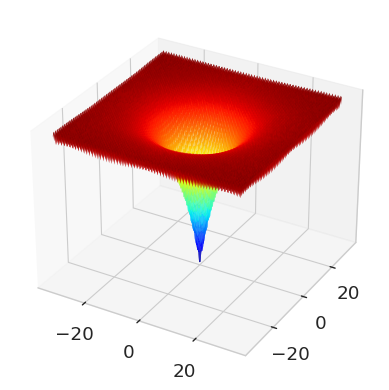

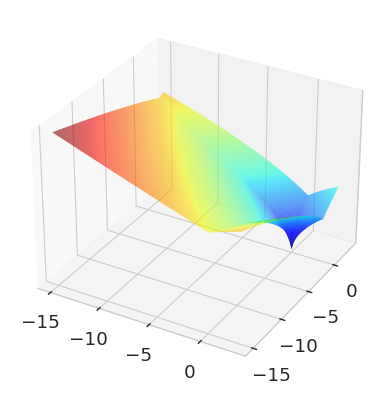

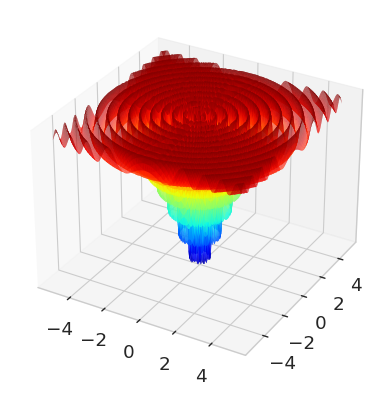

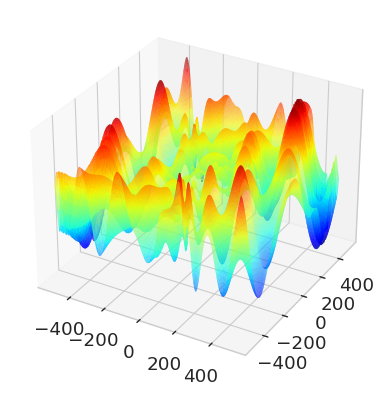

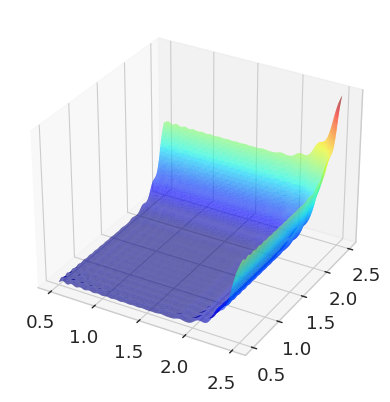

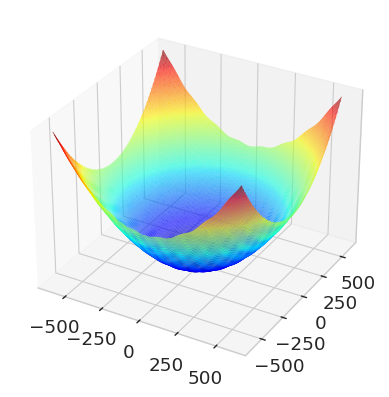

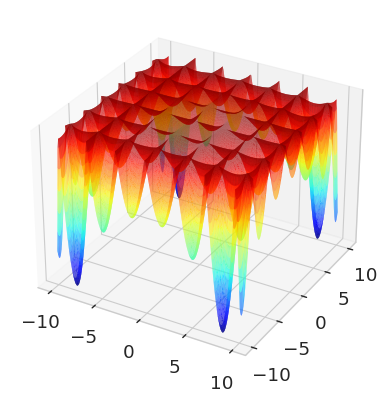

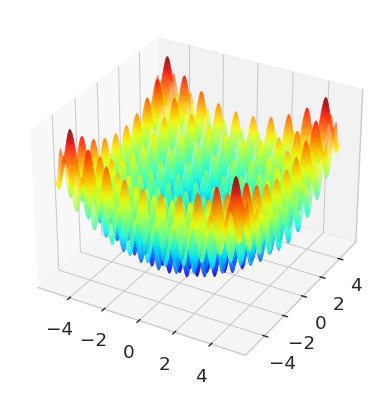

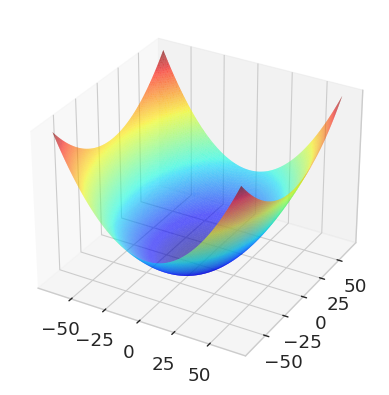

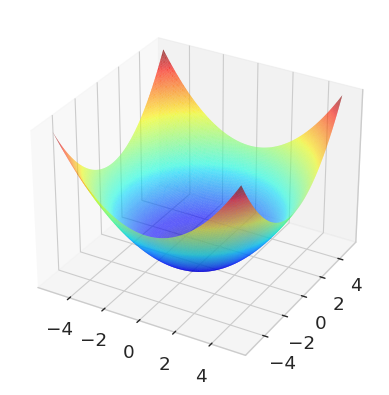

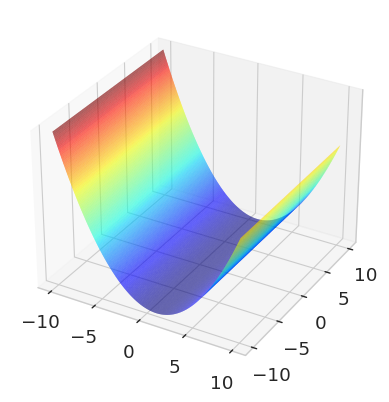

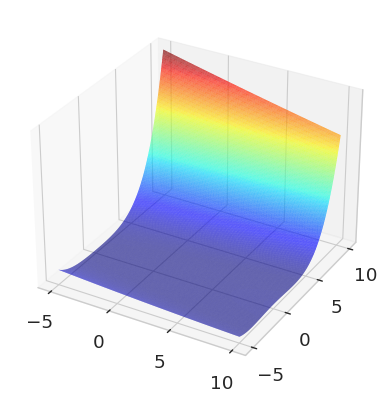

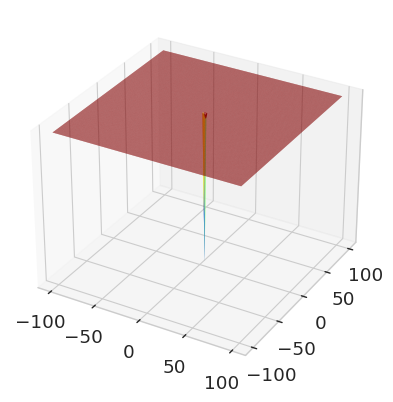

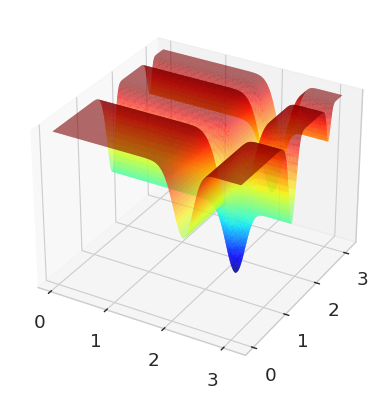

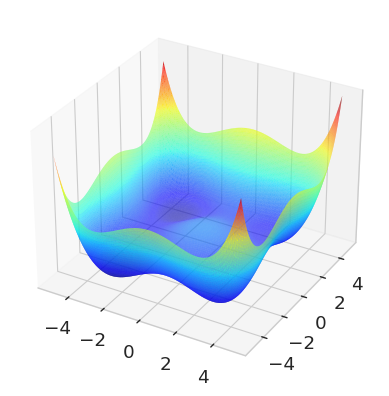

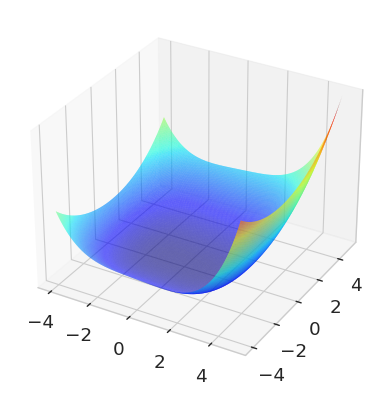

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


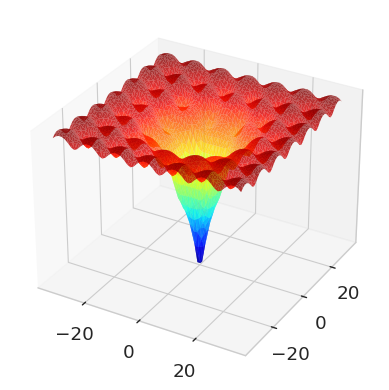

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


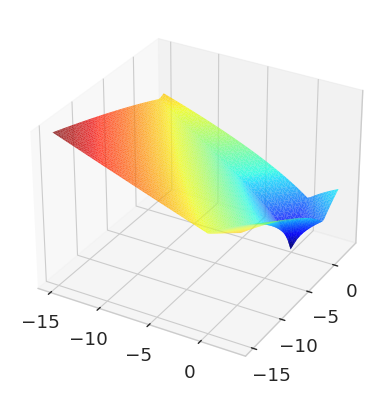

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


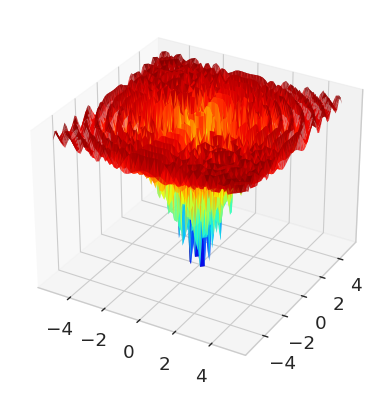

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


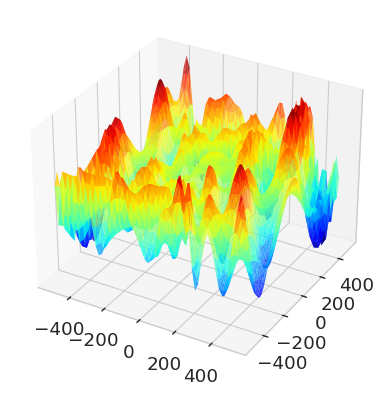

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


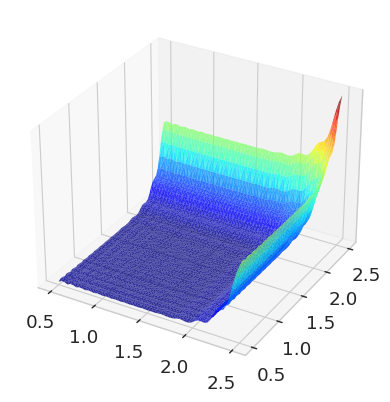

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


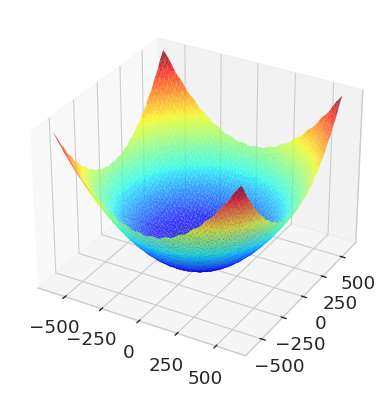

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


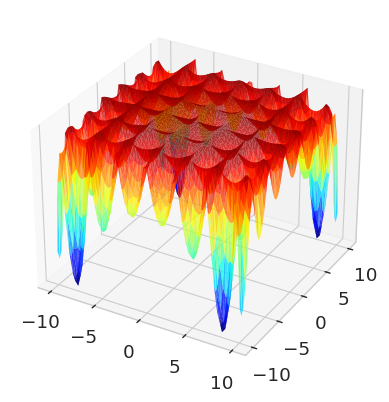

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


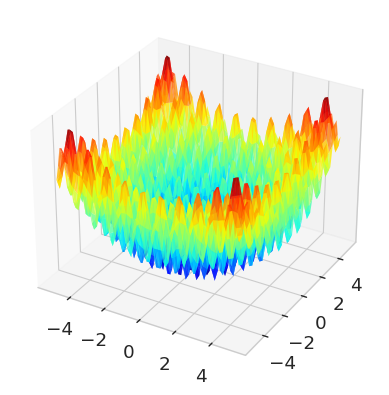

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


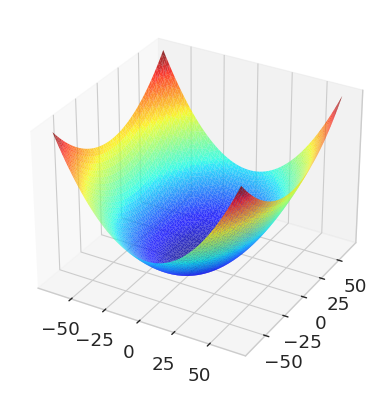

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


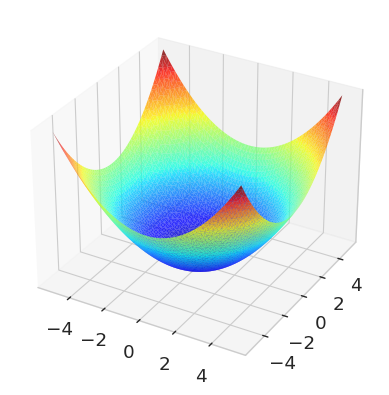

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


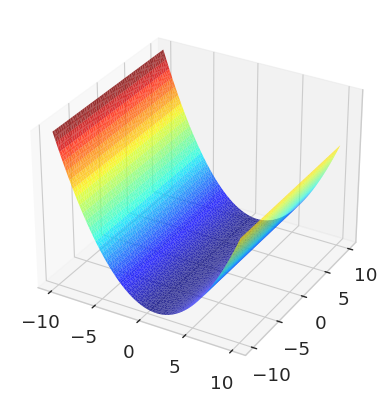

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


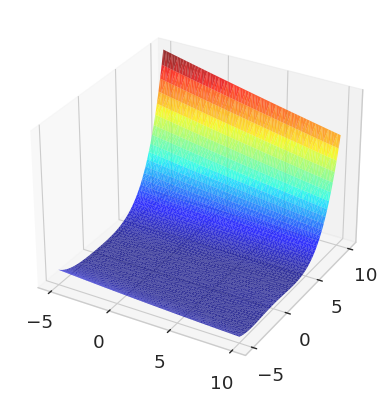

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


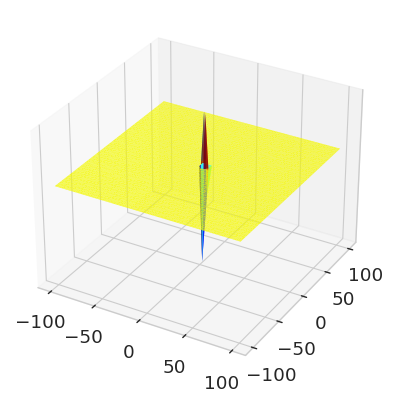

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


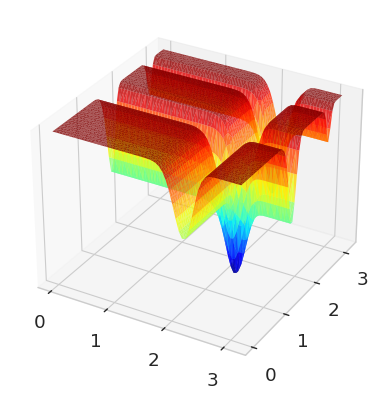

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


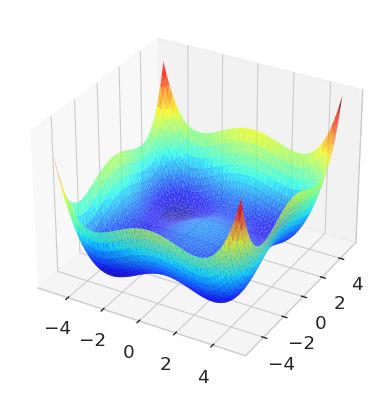

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


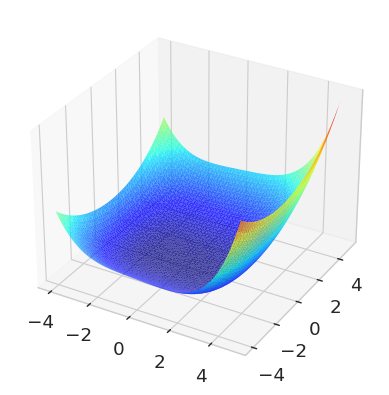

In [5]:
# Plot each function (2d):
FUNCTIONS = [AckleyFunction, BukinFunction6, DropWaveFunction, EggHolderFunction, GramacyLeeFunction, GrieWankFunction,
             HolderTableFunction, RastriginFunction, HyperEpsiloid, HyperSphere, DixonPrice, Rosenbrock, Easom,
             Michalewicz, StyblinskiTang, Powell]
# Set the style:
sns.set_style('whitegrid')
# Set the palette:
sns.set_palette('bright')
# Set the context:
sns.set_context('paper', font_scale=1.5)
# Set the figure size:
# plt.figure(figsize=(10, 6))
# Set the number of points:
n_points = (200, 60)
# Plot the surface:
for func in FUNCTIONS:
    # Create the function:
    f = func()
    # Create the substrate:
    minimum, maximum = f.bounds
    # Build and array with all x, y combinations:
    x = np.linspace(minimum, maximum, n_points[0])
    y = np.linspace(minimum, maximum, n_points[0])
    x_grid, y_grid = np.meshgrid(x, y)
    grid = np.column_stack([x_grid.ravel(), y_grid.ravel()])    
    # Evaluate the function:
    unstacked_ponts = f(grid)
    # Plot the surface:
    ax = plt.axes(projection='3d')
    ax.plot_trisurf(grid[:, 0], grid[:, 1], unstacked_ponts, cmap='jet', edgecolor='none', alpha=0.8)
    # Disable zticks:
    ax.set_zticks([])
    # Save the plot in EPS style:
    plt.savefig('./results/func_plots_nonames/' + func.__name__ + '.png', dpi=300, bbox_inches='tight', transparent=True)
    # Show the plot:
    plt.show()
# Plot the surface:
for func in FUNCTIONS:
    # Create the function:
    f = func()
    # Create the substrate:
    minimum, maximum = f.bounds
    # Build and array with all x, y combinations:
    x = np.linspace(minimum, maximum, n_points[1])
    y = np.linspace(minimum, maximum, n_points[1])
    x_grid, y_grid = np.meshgrid(x, y)
    grid = np.column_stack([x_grid.ravel(), y_grid.ravel()])    
    # Evaluate the function:
    unstacked_ponts = f(grid)
    # Plot the surface:
    ax = plt.axes(projection='3d')
    ax.plot_trisurf(grid[:, 0], grid[:, 1], unstacked_ponts, cmap='jet', edgecolor='none', alpha=0.8)
    # Disable zticks:
    ax.set_zticks([])
    # Save the plot in EPS style:
    plt.savefig('./results/func_plots_nonames/' + func.__name__ + '.eps', dpi=300, bbox_inches='tight', transparent=True)
    # Show the plot:
    plt.show()